Update:

    Sunday has to be 0 based off of when people buy alcohol (Thursday/Friday).

    Distribution of order numbers is skewed extremely right.

    Sunady/Monday are most active days. Lull mid-week. A little shock on Thursday/Friday..Booze?

    The highest number of orders are placed between 8AM-6PM. Strong right-tail indicating night use of this app.
    Low after 11PM.

    Most orders are Produce, dairy eggs, snacks and beverages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
order_products_train_df = pd.read_csv('order_products__train.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')


In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
print('TEST SHAPE:', order_products_prior_df.shape)
print('TRAIN SHAPE:', order_products_train_df.shape)

TEST SHAPE: (32434489, 4)
TRAIN SHAPE: (1384617, 4)


In [9]:
count_set = orders_df.eval_set.value_counts()

In [10]:
count_set

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [11]:
tester = departments_df.department_id.value_counts()
tester2 = departments_df.department.value_counts()

In [12]:
len(tester), len(tester2)

(21, 21)

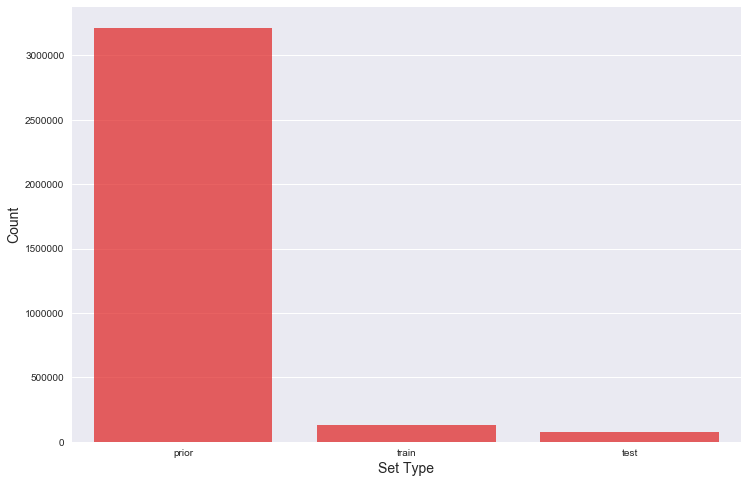

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(count_set.index, count_set.values, alpha=0.7, color='r')
sns.set(font_scale=1)
plt.xlabel('Set Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [14]:
count_order_nums_df = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


In [15]:
count_order_nums_df.head(10)

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


In [16]:
count_order_num_times = count_order_nums_df.order_number.value_counts()

In [17]:
count_order_nums_df.min()

user_id         1
order_number    4
dtype: int64

Just validating that there were is a minimum of four orders per person. Let's visualize it.

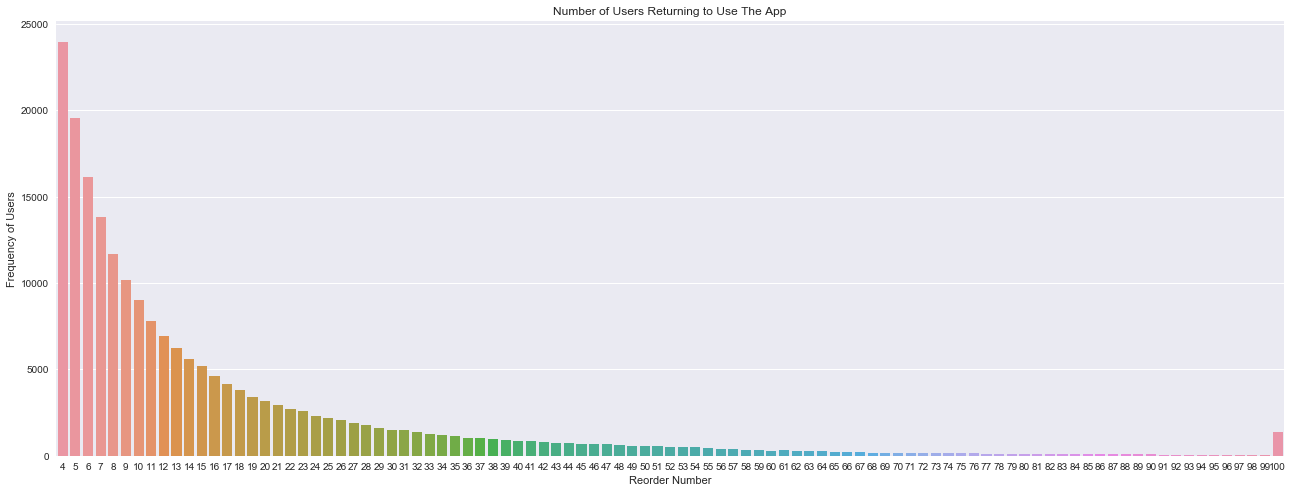

In [18]:
plt.figure(figsize=(22,8))
sns.barplot(count_order_num_times.index, count_order_num_times.values)
plt.xlabel('Reorder Number')
plt.ylabel('Frequency of Users')
plt.title('Number of Users Returning to Use The App')
plt.show()

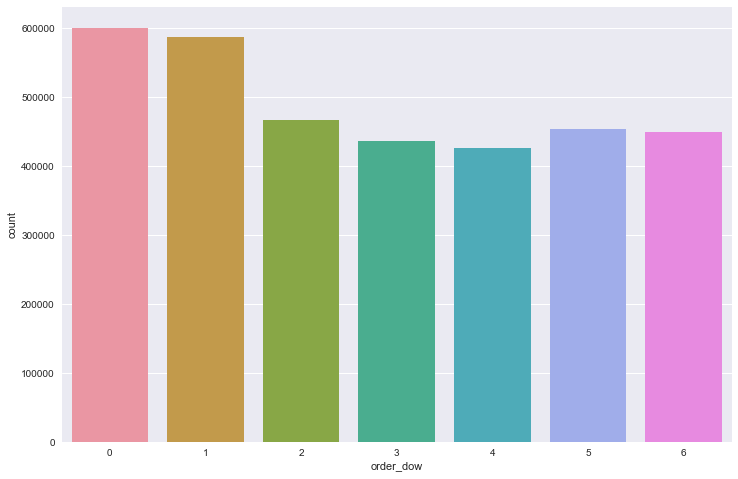

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(orders_df.order_dow, orient="h")
# sns.despine(left=True, bottom=True)
plt.show()

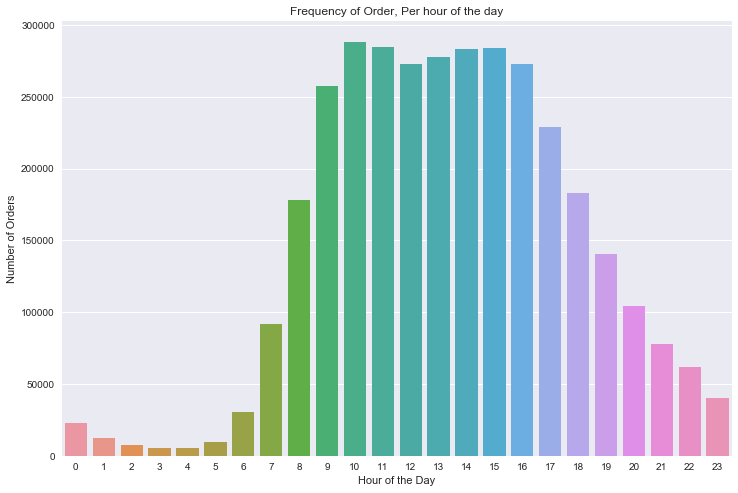

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(orders_df.order_hour_of_day, data=orders_df)
plt.title('Frequency of Order, Per hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

In [19]:
hour_per_day_df = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
hour_per_day_df.shape


(168, 3)

We are now creating a df that will count the number of orders per hour grouped by the day of week. Since 24(hours) * 7(days per week) = 168 we should have 168 rows. We do, let's map it.

In [20]:
hour_per_day_df = hour_per_day_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

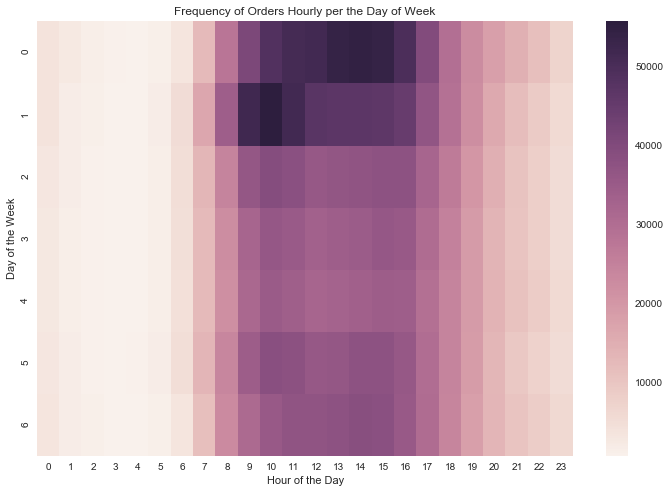

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(hour_per_day_df)
plt.title('Frequency of Orders Hourly per the Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In order to judge whether the 0 is Friday, Saturday, or Sunday I'm going to see when the highest levels of alcohol orders are placed.  I'm under the assumption that Friday afternoon/night is so high because of alcohol orders and Saturday morning the same.  Let's merge the datasets and see.

In [21]:
order_products_prior_df.shape, order_products_train_df.shape 

((32434489, 4), (1384617, 4))

In [22]:
# merge order_products_prior_df and products on product_id(foreign key)
shopping_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

# merge order_products_prior_df and aisles_df on the aisle (foreign key)
shopping_prior_df = pd.merge(shopping_prior_df, aisles_df, on='aisle_id', how='left')

# merge order_products_prior_df and departments_df on the department_id (foreign key)
shopping_prior_df = pd.merge(shopping_prior_df, departments_df, on='department_id', how='left')


In [23]:
shopping_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


Now I have two major datasets. The first deals with order details like dates, hours, day of the week.  This new one called shopping_prior_df deals with specific food details of that order.

In [24]:
shop_df = pd.merge(shopping_prior_df, orders_df, on='order_id', how='left')

In [ ]:
shop_df.head()

In [27]:
alcohol_df = shop_df.groupby(['department','order_dow', 'order_hour_of_day'])['order_id'].aggregate('count').reset_index()


In [28]:
alcohol_df['IsAlcohol'] = alcohol_df['department'].str.contains('alcohol')

alcohol_df['IsAlcohol'] = alcohol_df['IsAlcohol'].astype(int)

In [29]:
alcohol_df.head()

,department,order_dow,order_hour_of_day,order_id,IsAlcohol
0,alcohol,0,0,52,1
1,alcohol,0,1,39,1
2,alcohol,0,2,26,1
3,alcohol,0,3,27,1
4,alcohol,0,4,37,1


So now we have the dataset with the columns 'department', 'order_dow', 'order_hour_of_day', 'order_id', and 'IsAlcohol'. 

'IsAlcohol' will give us a 1 if it's an alcohol order, let's map out what it looks like given hour and day of week.

In [30]:
alcohol_df = alcohol_df[alcohol_df.IsAlcohol != 0]

In [31]:
alcohol_df.shape

(168, 5)

Again, we have 168 rows which means that we have 7 days of 24 hours and the count given by order_id. Let's Map.

In [32]:
alcohol_heatmap = alcohol_df[['order_dow', 'order_hour_of_day', 'order_id']]

In [33]:
alcohol_heatmap = alcohol_heatmap.pivot('order_dow', 'order_hour_of_day', 'order_id')

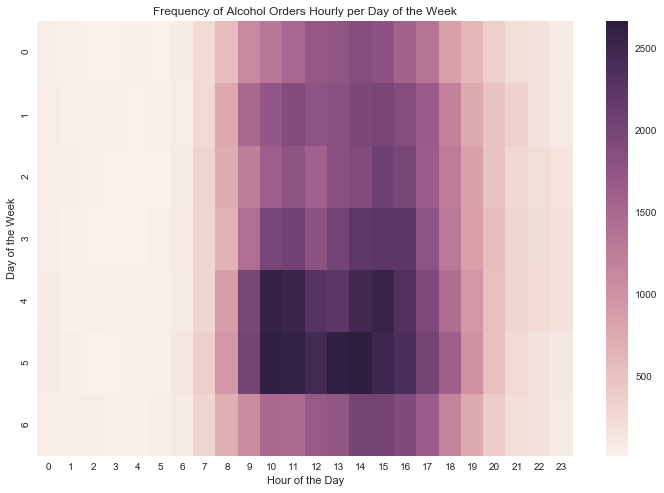

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(alcohol_heatmap)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Frequency of Alcohol Orders Hourly per Day of the Week')
plt.draw()

In [34]:
food_count_df = shop_df.groupby('department')['order_id'].aggregate('count').reset_index()

In [35]:
food_count_df

,department,order_id
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569
5,bulk,34573
6,canned goods,1068058
7,dairy eggs,5414016
8,deli,1051249
9,dry goods pasta,866627


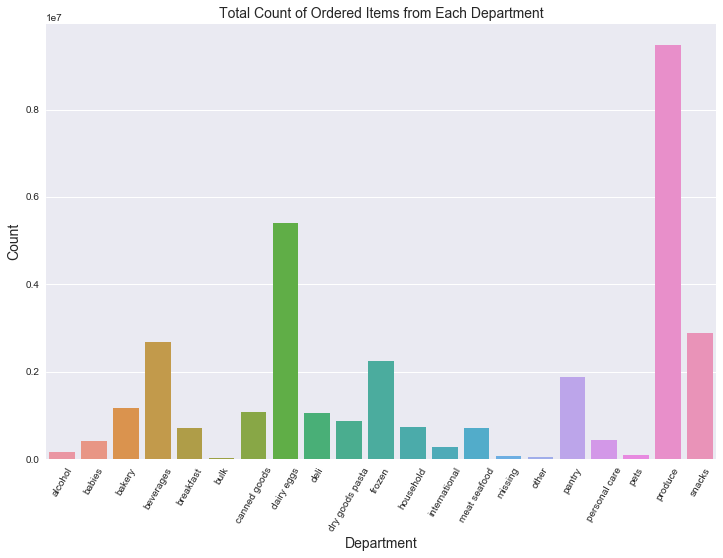

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(food_count_df.department, food_count_df.order_id)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=60)
plt.title('Total Count of Ordered Items from Each Department', fontsize=14)
plt.draw()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [38]:
shop_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [39]:
shop_df.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
department                 object
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [40]:
X = shop_df.drop(['product_id', 'aisle', 'department', 'eval_set', 'days_since_prior_order'], axis=1)
y = shop_df.product_id

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22704142, 9) (22704142,)
(9730347, 9) (9730347,)


In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.000903991591138


In [70]:
shop_df.days_since_prior_order.unique()

array([  8.,  12.,   7.,   9.,  30.,  17.,   5.,  23.,  10.,   1.,   3.,
         2.,  13.,   6.,  nan,   0.,  25.,  14.,  18.,  11.,  21.,   4.,
        15.,  20.,  19.,  27.,  16.,  24.,  22.,  26.,  28.,  29.])

In [77]:
shop_df.days_since_prior_order.unique()

array([  8.,  12.,   7.,   9.,  30.,  17.,   5.,  23.,  10.,   1.,   3.,
         2.,  13.,   6.,  nan,   0.,  25.,  14.,  18.,  11.,  21.,   4.,
        15.,  20.,  19.,  27.,  16.,  24.,  22.,  26.,  28.,  29.])

In [76]:
# the column days_since_prior_order has 6.41% missing values.  These null values pertain to those who are ordering
#    for the first time ever.  I will impute the value 

(shop_df.days_since_prior_order.isnull().sum() * 100) / shop_df.shape[0]

6.4069700620225589

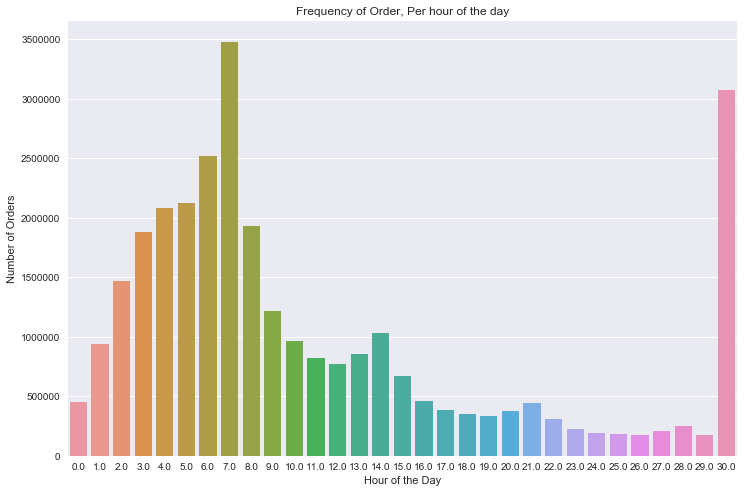

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(shop_df.days_since_prior_order, data=shop_df)
plt.title('Frequency of Order, Per days since prior order')
plt.xlabel('Days since last order')
plt.ylabel('Number of Orders')
plt.show()

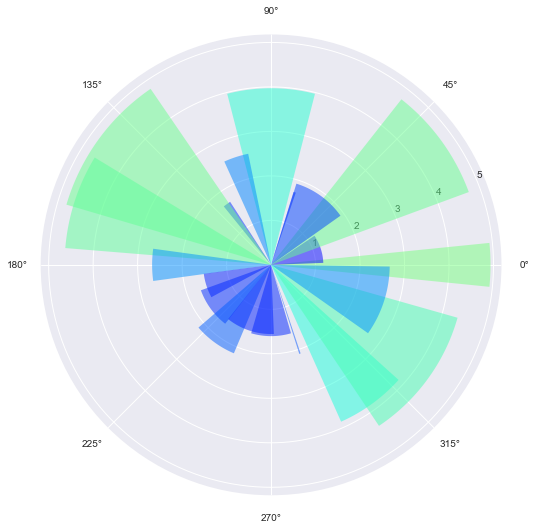

In [90]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 5*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

show()

### Random Forest Classifier (Killed Kernel)

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

NameError: name 'train_test_split' is not defined

In [4]:
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

### Gradient Boosted Regression Tree (GBm)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)